# The HFM library - A fast marching solver with adaptive stencils

## Part : Algorithmic enhancements to the fast marching method
## Chapter : input and output

This notebook illustrates the implementation of monotone schemes on non-rectangular domains.

## 0. Importing the required libraries

In [3]:
import sys; sys.path.insert(0,"../..") # Allow import of agd from parent directory (useless if conda package installed)
#from Miscellaneous import TocTools; print(TocTools.displayTOC('RefinedIO','FMM'))

In [4]:
from agd import HFMUtils
from agd import Metrics

In [5]:
# We will also need some standard python libraries.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
def reload_submodules():
    HFMUtils.reload_submodules()
    Metrics.reload_submodules()

## 1. Input and output

The following example is taken from the notebook on the Fisher-Rao distance [link](FisherRao.ipynb)

In [10]:
hfmIn = {} 
hfmIn['model'] = 'Riemann2' # Adequate model for two dimensional Riemannian metrics.
hfmIn['arrayOrdering'] = 'RowMajor' 

# Create the parameter space
n=100
hfmIn.update(HFMUtils.Rect(sides=[[-2,2],[0,1]],dimx=4*n))
mu,sig = HFMUtils.GetGrid(hfmInput)

hfmIn['seeds'] = np.array([ [0,0.3] ]) # A single seed
hfmIn['tips'] = np.array([ (x,y) for y in HFMUtils.CenteredLinspace(0,1,3) 
                             for x in HFMUtils.CenteredLinspace(-2,2,4)]) # 12 tips

hfmIn['exportValues'] = 1
hfmIn['order'] = 2

In [18]:
help(HFMUtils.Run)

Help on function Run in module agd.HFMUtils:

Run(hfmIn, smart=False, **kwargs)
    Calls to the HFM library, returns output and prints log.
    
    Parameters
    ----------
    smart : bool  
            Choose between a smart and raw run
    **kwargs
            Passed to RunRaw or RunSmart



### 1.1 Raw data

The HamiltonFastMarching (HFM) library only expects and returns data in the following basic formats: 
- numpy arrays with elements of type *float64*
- strings

Furthermore, the dimensions of the arrays corresponding to physical space are expected to be the last ones. This convention is opposite to the one taken in the agd library, where the physical dimensions come first. For that reason it is not always convenient to input and output data in raw format

In [8]:
hfmInput['metric'] = np.stack( (1./sig**2, 0.*sig, 2./sig**2), 2)

In [19]:
hfmOutput = HFMUtils.Run(hfmInput,smart=False)

ERROR : the HFMpy library is not found, and the path to the FileHFM binaries is not set 


You can set the path to the FileHFM compiled binaries, as follows : 

>>> agd.HFMUtils.LibraryCall.FileHFM_binary_dir = 'path/to/FileHFM/bin'



In order to do this automatically in the future, please set this path 
in the first line of a file named 'FileHFM_binary_dir.txt' in the current directory

>>> with open('FileHFM_binary_dir.txt','w+') as file: file.write('path/to/FileHFM/bin')



FileNotFoundError: [Errno 2] No such file or directory: 'FileHFM_binary_dir.txt'

### 1.2 Smart data (Pre- and post-processed)

In [11]:
riemann = Metrics.Riemann.from_diagonal(1./sig**2,2./sig**2)
hfmInput['metric'] = riemann

In [8]:
riemann.model_HFM()

'Riemann2'

In [9]:
hfmInput['model']='AsymmetricQuadratic2'
hfmInput['metric'] = Metrics.AsymQuad.from_cast(riemann)

In [12]:
hfmOutput = HFMUtils.Run(hfmInput,smart=True)

Field verbosity defaults to 1
Field spreadSeeds defaults to -1
Field showProgress defaults to 0
Field factoringMethod defaults to None
Fast marching solver completed in 0.017728 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 8.45
Field exportActiveNeighs defaults to 0
Field exportGeodesicFlow defaults to 0



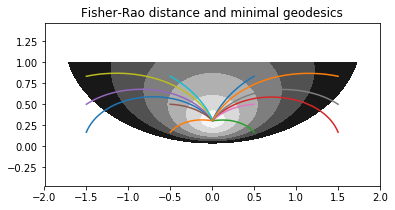

In [13]:
fig = plt.figure(figsize=[6,3]); plt.title('Fisher-Rao distance and minimal geodesics'); plt.axis('equal'); 
plt.contourf(mu,sig,hfmOutput['values'],cmap='Greys',levels=np.linspace(0,3,7));  # Display the value function. 
for geo in hfmOutput['geodesics']:  plt.plot(*geo)
#savefig(fig,"FisherRao_Gaussian1D.png")

In [12]:
hfmOutput.keys()

dict_keys(['FMCPUTime', 'GeodesicCPUTime', 'MaxStencilWidth', 'StencilCPUTime', 'defaulted', 'geodesicLengths', 'geodesicPoints', 'nAccepted', 'unusedFromCompute', 'values', 'visitedUnset', 'log', 'retcode'])

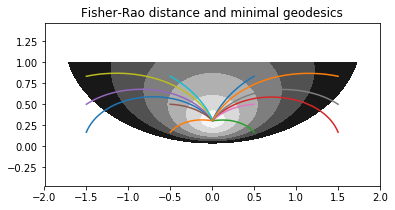

In [10]:
fig = plt.figure(figsize=[6,3]); plt.title('Fisher-Rao distance and minimal geodesics'); plt.axis('equal'); 
plt.contourf(mu,sig,hfmOutput['values'],cmap='Greys',levels=np.linspace(0,3,7));  # Display the value function. 
for geo in HFMUtils.GetGeodesics(hfmOutput):  plt.plot(geo[:,0],geo[:,1])
#savefig(fig,"FisherRao_Gaussian1D.png")

In [16]:
def f():
    """help of f"""
    pass
def g():
    """help of g"""+f.__doc__
    pass

In [18]:
help(g)

Help on function g in module __main__:

g()



In [15]:
f.__doc__

'help of f'

In [13]:
attr(f)

NameError: name 'attr' is not defined